In [15]:
import glob
import codecs
import numpy
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score


pd.set_option('display.max_rows', 20, 
              'display.max_columns', 100)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
def manage_tariff(data):
#   data['length'] = data['heading'].apply(len)
  #  data['heading'] = data.heading.apply(range_txt)
    
    db = []
    for i in range(len(data)):
    
     
    
        db.append({'descript': data.product_desc[i] ,'class':data.heading[i] })
    
    return db

In [3]:
reads =pd.read_excel('data/master.xlsx',sheet_name='Sheet1', parse_string =['heading'])
reads['heading'] = reads['heading'].map('{:04}'.format)
books = reads[['heading','product_desc']]
reads =pd.read_excel('data/deci.xlsx',sheet_name='Sheet1', parse_string =['heading'])
reads['heading'] = reads['heading'].map('{:04}'.format)
deci = reads[['heading','product_desc']]
reads =pd.read_excel('data/decx.xlsx',sheet_name='Sheet1', parse_string =['heading'])
reads['heading'] = reads['heading'].map('{:04}'.format)
decx = reads[['heading','product_desc']]

In [4]:
concats = pd.concat([books,deci, decx], ignore_index=True)
concats['product_desc'] = concats['product_desc'].str.lower()
data = manage_tariff(concats)
df = pd.DataFrame(data)
df

,descript,class
0,"horses; live, pure-bred breeding animals",0101
1,"horses; live, other than pure-bred breeding an...",0101
2,"asses, mules and hinnies; live",0101
3,"bovine animals; live, pure-bred breeding animals",0102
4,"bovine animals; live, other than pure-bred bre...",0102
...,...,...
76612,compressor,8414
76613,compressor,8414
76614,compressor,8414
76615,washing machine,8450


In [5]:
df['length'] = df['descript'].apply(len)
df.head()

,descript,class,length
0,"horses; live, pure-bred breeding animals",0101,40
1,"horses; live, other than pure-bred breeding an...",0101,51
2,"asses, mules and hinnies; live",0101,30
3,"bovine animals; live, pure-bred breeding animals",0102,48
4,"bovine animals; live, other than pure-bred bre...",0102,59


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

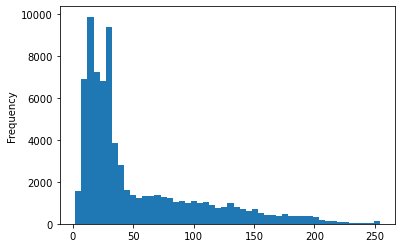

In [7]:
df['length'].plot(bins=50,kind = 'hist')

In [8]:
df['length'].describe()

count    76617.000000
mean        53.502930
std         50.591395
min          2.000000
25%         18.000000
50%         31.000000
75%         76.000000
max        254.000000
Name: length, dtype: float64

In [9]:
messages = df.copy()
messages[messages['length'] == 254]['descript'].iloc[0]

'textile fabric, felt & felt-lined woven fabrics, coated/covered/laminated with rubber, leather or other material, for card clothing, similar fabrics used for technical purposes, including rubber impregnated narrow velvet fabrics to cover weaving spindles'

D:\Anaconda\envs\pyviz-tutorial\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Anaconda\envs\pyviz-tutorial\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\Anaconda\envs\pyviz-tutorial\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\Anaconda\envs\pyviz-tutorial\lib\site-pac

array([[<AxesSubplot:title={'center':'0101'}>,
        <AxesSubplot:title={'center':'0102'}>,
        <AxesSubplot:title={'center':'0103'}>, ...,
        <AxesSubplot:title={'center':'0409'}>,
        <AxesSubplot:title={'center':'0410'}>,
        <AxesSubplot:title={'center':'0501'}>],
       [<AxesSubplot:title={'center':'0502'}>,
        <AxesSubplot:title={'center':'0503'}>,
        <AxesSubplot:title={'center':'0504'}>, ...,
        <AxesSubplot:title={'center':'0805'}>,
        <AxesSubplot:title={'center':'0806'}>,
        <AxesSubplot:title={'center':'0807'}>],
       [<AxesSubplot:title={'center':'0808'}>,
        <AxesSubplot:title={'center':'0809'}>,
        <AxesSubplot:title={'center':'0810'}>, ...,
        <AxesSubplot:title={'center':'1108'}>,
        <AxesSubplot:title={'center':'1109'}>,
        <AxesSubplot:title={'center':'1201'}>],
       ...,
       [<AxesSubplot:title={'center':'8908'}>,
        <AxesSubplot:title={'center':'9001'}>,
        <AxesSubplot:title={'c

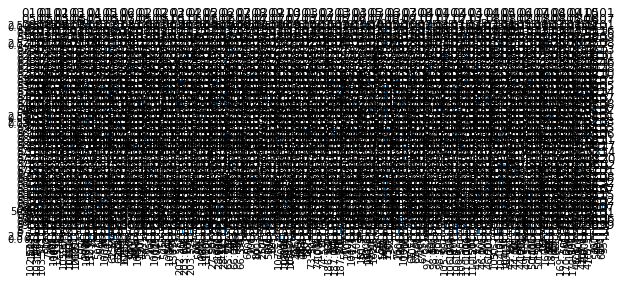

In [10]:
messages.hist(column='length',by ='class',bins=50,figsize = (10,4))

In [11]:
import string
mess = 'Sample message ! Notice: it has punctuation'
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
nopunc = [char for char in mess if char not in string.punctuation]
nopunc = ''.join(nopunc)
nopunc

'Sample message  Notice it has punctuation'

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [17]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [18]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']